In [1]:
rm(list = ls())
library(ggplot2)

In [6]:
## MAGMA results for CAD and SCZ

SCZ=read.table("./Data/magma.genes_SCZ.out", header = TRUE)
CAD=read.table("./Data/magma.genes_CAD.out", header = TRUE)


	Wilcoxon rank sum test with continuity correction

data:  dNdS_sig and dNdS_insig
W = 233983, p-value = 2.959e-09
alternative hypothesis: true location shift is not equal to 0


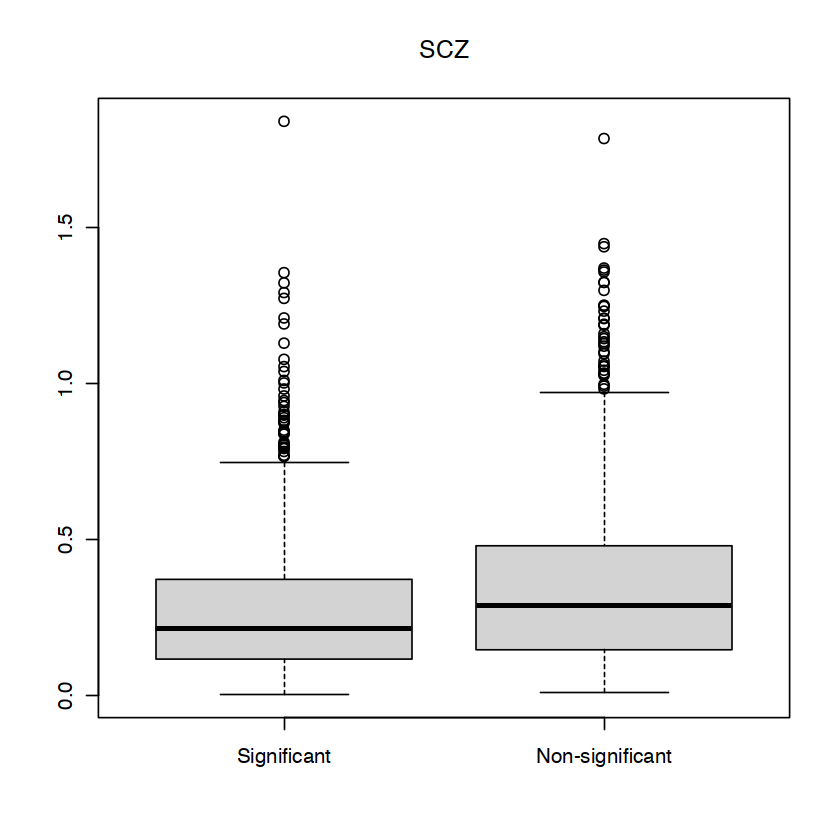


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  Rate_sig and Rate_insig
D = 0.14414, p-value = 3.162e-07
alternative hypothesis: two-sided


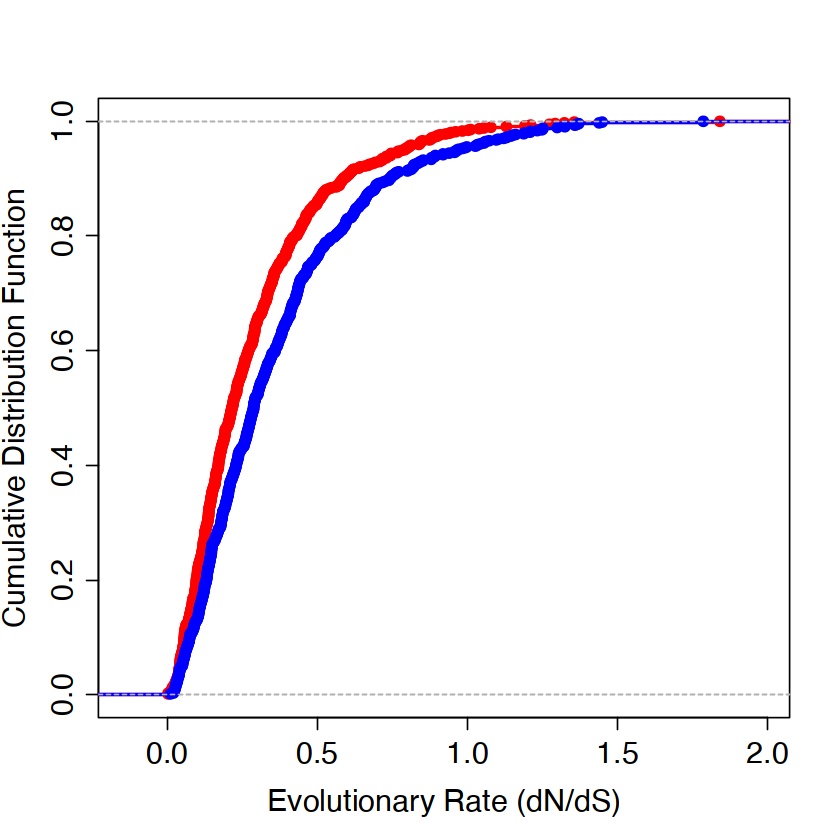

In [8]:
## Evolutionary_rate
ER_A=read.csv("./Data/Chakraborty_Genomics_2016_1-s2.0-S0888754315300392-mmc1.csv", header = TRUE)
ER_A=as.data.frame(ER_A)
dNdS=ER_A$average_dN.dS



index_top= order(SCZ$ZSTAT, decreasing = TRUE)[1:1000] #which(SCZ$P < 0.05)
index_bottom= order(SCZ$ZSTAT, decreasing = FALSE)[1:1000]


dNdS_sig=dNdS[match(SCZ$GENE[index_top], ER_A$Ensembl.Gene.ID)]
dNdS_insig=dNdS[match(SCZ$GENE[index_bottom], ER_A$Ensembl.Gene.ID)]

wilcox.test(dNdS_sig, dNdS_insig)
boxplot(dNdS_sig, dNdS_insig, names=c("Significant", "Non-significant"), main="SCZ")


Rate_sig=dNdS_sig[dNdS_sig>0]
plot(ecdf(Rate_sig), col="red", main="", lwd=2, xlab="Evolutionary Rate (dN/dS)", ylab="Cumulative Distribution Function", cex.lab=1.5, cex.axis=1.5)

Rate_insig=dNdS_insig[dNdS_insig>0]
lines(ecdf(Rate_insig), col="blue", lwd=2)


ks.test(Rate_sig, Rate_insig)


	Wilcoxon rank sum test with continuity correction

data:  dNdS_sig and dNdS_insig
W = 298246, p-value = 0.3394
alternative hypothesis: true location shift is not equal to 0


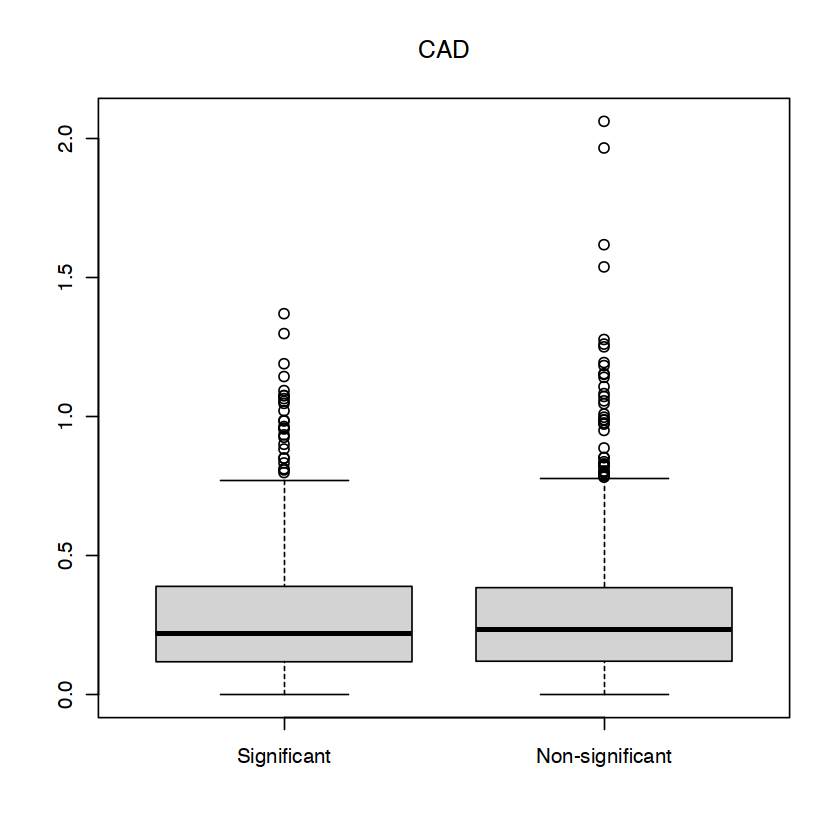


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  Rate_sig and Rate_insig
D = 0.040337, p-value = 0.5475
alternative hypothesis: two-sided


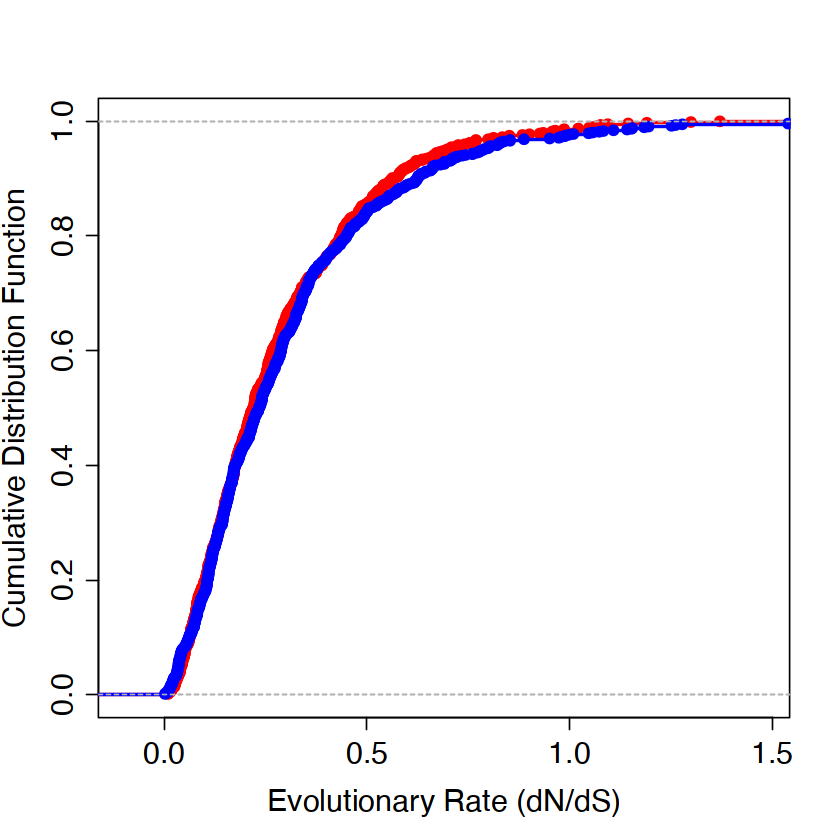

In [9]:
index_top= order(CAD$ZSTAT, decreasing = TRUE)[1:1000] #which(CAD$P < 0.05)
index_bottom= order(CAD$ZSTAT, decreasing = FALSE)[1:1000]


dNdS_sig=dNdS[match(CAD$GENE[index_top], ER_A$Ensembl.Gene.ID)]
dNdS_insig=dNdS[match(CAD$GENE[index_bottom], ER_A$Ensembl.Gene.ID)]

wilcox.test(dNdS_sig, dNdS_insig)
boxplot(dNdS_sig, dNdS_insig, names=c("Significant", "Non-significant"), main="CAD")


Rate_sig=dNdS_sig[dNdS_sig>0]
plot(ecdf(Rate_sig), col="red", main="", lwd=2, xlab="Evolutionary Rate (dN/dS)", ylab="Cumulative Distribution Function", cex.lab=1.5, cex.axis=1.5)

Rate_insig=dNdS_insig[dNdS_insig>0]
lines(ecdf(Rate_insig), col="blue", lwd=2)


ks.test(Rate_sig, Rate_insig)